# <font style="font-size:40px"><center><b>Machine Learning</b></center></font><font                        style="font-size:30px"><center><b>Master in Computational Finance (MCF) </b></center></font> 

<center> 

# 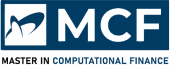

<center/>

# <font color='tomato' style="font-size:40px"><center><b>Homework 2</b></center></font></b></center></font> 

<center>
<b>profesor: </b> Nikola Vasiljevic

<b>students: </b> 
Nikola Krivacevic, Aleksandar Milinkovic
</center>





## Importing libraries:


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd  

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Unsupervised Learning

Consider the Federal Reserve Bank of St. Louis’ monthly database of macroeconomic factors
created by Michael W. McCracken et al. The data and the associated research paper are
provided on the shared drive. The list of all variables and the respective recommended data
transformations are listed in the appendix of the paper (pp. 586–588).

### (a) Data preprocessing

Conduct a data preprocessing algorithm for all features in the FRED–MD dataset. As a minimum consider the recommended transformations, data scaling, missing observations, and outliers. Provide a brief description and justification of your procedure, and summarize the most notable findings.

#### Extracting the data

In [3]:
df = pd.read_csv("McCracken_Macro_Dataset_Monthly.csv")
df

sasdate        RPI  W875RX1  ...   DTCTHFNM     INVEST  VXOCLSx
0    Transform:      5.000      5.0  ...       6.00     6.0000   1.0000
1    01/01/1959   2442.158   2293.2  ...   12298.00    84.2043      NaN
2    02/01/1959   2451.778   2301.5  ...   12298.00    83.5280      NaN
3    03/01/1959   2467.594   2318.5  ...   12349.00    81.6405      NaN
4    04/01/1959   2483.671   2334.9  ...   12484.00    81.8099      NaN
..          ...        ...      ...  ...        ...        ...      ...
748  04/01/2021  18261.337  14130.6  ...  751213.18  5072.8265  15.9924
749  05/01/2021  17778.066  14145.3  ...  754248.23  5169.0271  17.9421
750  06/01/2021  17716.168  14168.2  ...  756290.99  5235.2502  14.8913
751  07/01/2021  17838.510  14201.1  ...  757292.96  5281.4744  15.5122
752  08/01/2021        NaN      NaN  ...        NaN  5335.6648  14.6821

[753 rows x 128 columns]

Let's first take out the first row as it represents the recommended data transformation:

In [4]:
df_transformations = df.iloc[0]
df.drop(index=df.index[0], axis=0, inplace=True)

df_transformations

sasdate            Transform:
RPI                         5
W875RX1                     5
DPCERA3M086SBEA             5
CMRMTSPLx                   5
                      ...    
UMCSENTx                    2
DTCOLNVHFNM                 6
DTCTHFNM                    6
INVEST                      6
VXOCLSx                     1
Name: 0, Length: 128, dtype: object

And let's make the first column (date) as index in our dataframe:

In [5]:
df = df.set_index('sasdate')
df.index.rename('Date', inplace=True)
df

RPI  W875RX1  DPCERA3M086SBEA  ...   DTCTHFNM     INVEST  VXOCLSx
Date                                             ...                               
01/01/1959   2442.158   2293.2           17.272  ...   12298.00    84.2043      NaN
02/01/1959   2451.778   2301.5           17.452  ...   12298.00    83.5280      NaN
03/01/1959   2467.594   2318.5           17.617  ...   12349.00    81.6405      NaN
04/01/1959   2483.671   2334.9           17.553  ...   12484.00    81.8099      NaN
05/01/1959   2498.026   2350.4           17.765  ...   12646.00    80.7315      NaN
...               ...      ...              ...  ...        ...        ...      ...
04/01/2021  18261.337  14130.6          123.827  ...  751213.18  5072.8265  15.9924
05/01/2021  17778.066  14145.3          123.235  ...  754248.23  5169.0271  17.9421
06/01/2021  17716.168  14168.2          123.891  ...  756290.99  5235.2502  14.8913
07/01/2021  17838.510  14201.1          123.712  ...  757292.96  5281.4744  15.5122
08/01/2021        NaN      NaN              NaN  ...        NaN  5335.6648  14.6821

[752 rows x 127 columns]

Let's print out the characteristics of our initial dataframe:

In [6]:
df.describe()

RPI       W875RX1  ...       INVEST     VXOCLSx
count    751.000000    751.000000  ...   752.000000  710.000000
mean    8561.801019   7332.305859  ...  1121.704579   19.202106
std     4397.444144   3504.633702  ...  1182.896977    7.376781
min     2442.158000   2293.200000  ...    71.186400    8.016400
25%     4788.852000   4277.200000  ...   168.985300   14.163925
50%     7717.737000   6761.400000  ...   597.720100   17.564050
75%    12389.173500  10480.350000  ...  1870.125200   22.472800
max    21267.506000  14225.600000  ...  5335.664800   67.151000

[8 rows x 127 columns]

#### Missing values

There should be around 750 observations for each feature.

If we take a closer look in the FRED-MD dataset provided in this problem set, we can see that some of the features have much less observations i.e. they have missing data.

For example, let's take a look at these features:

In [7]:
df[['ACOGNO', 'ANDENOx', 'TWEXAFEGSMTHx', 'UMCSENTx']].describe()

ACOGNO        ANDENOx  TWEXAFEGSMTHx    UMCSENTx
count     354.000000     643.000000     584.000000  597.000000
mean   154696.206215   45140.518164     111.451477   86.430486
std     39064.510164   24810.938208      16.041805   12.341583
min     86445.000000    6010.041362      82.678300   51.700000
25%    118096.250000   24368.229560     101.687714   77.200000
50%    160658.000000   46437.000000     109.952200   89.800000
75%    192151.000000   66489.000000     119.466861   95.100000
max    214158.000000  144012.000000     170.302034  112.000000

The most critical feature is *ACOGNO* which has half of the observations missing.

*ANDENOx*, *TWEXAFEGSMTHx* and *UMCSENTx* are missing less observations, so we have to fill them in with some values.

We will pick **mean** value for the missing values.

These four features were not the only ones that have the missing data, but the other columns have much less blank field.

In [8]:
df_full = df.fillna(df.mean())
df_full

RPI       W875RX1  ...     INVEST    VXOCLSx
Date                                    ...                      
01/01/1959   2442.158000   2293.200000  ...    84.2043  19.202106
02/01/1959   2451.778000   2301.500000  ...    83.5280  19.202106
03/01/1959   2467.594000   2318.500000  ...    81.6405  19.202106
04/01/1959   2483.671000   2334.900000  ...    81.8099  19.202106
05/01/1959   2498.026000   2350.400000  ...    80.7315  19.202106
...                  ...           ...  ...        ...        ...
04/01/2021  18261.337000  14130.600000  ...  5072.8265  15.992400
05/01/2021  17778.066000  14145.300000  ...  5169.0271  17.942100
06/01/2021  17716.168000  14168.200000  ...  5235.2502  14.891300
07/01/2021  17838.510000  14201.100000  ...  5281.4744  15.512200
08/01/2021   8561.801019   7332.305859  ...  5335.6648  14.682100

[752 rows x 127 columns]

Let's take a look at the four problematic columns from the above:

In [9]:
df_full[['ACOGNO', 'ANDENOx', 'TWEXAFEGSMTHx', 'UMCSENTx']].describe()

ACOGNO        ANDENOx  TWEXAFEGSMTHx    UMCSENTx
count     752.000000     752.000000     752.000000  752.000000
mean   154696.206215   45140.518164     111.451477   86.430486
std     26782.416969   22939.858391      14.134080   10.994463
min     86445.000000    6010.041362      82.678300   51.700000
25%    154696.206215   26597.667052     104.116235   81.200000
50%    154696.206215   45140.518164     111.451477   86.430486
75%    154696.206215   63300.250000     115.927380   93.700000
max    214158.000000  144012.000000     170.302034  112.000000

We can now see that all features have all observations.

#### Applying the recommended transformations

The paperwork that describes FRED-MD dataset has suggested transofrmation for each column and each one of them has the `tcode`.

All these transformations are implemented using Python functions.

In [10]:
# Transformations
def transform(dataframe, feature, tcode):
  if tcode == 1:
    return dataframe[feature]
  if tcode == 2:
    return dataframe[feature] - dataframe[feature].shift(1)
  if tcode == 3:
    return (dataframe[feature] - dataframe[feature].shift(1))**2
  if tcode == 4:
    return np.log(dataframe[feature])
  if tcode == 5:
    return np.log(dataframe[feature]) - np.log(dataframe[feature].shift(1))
  if tcode == 6:
    return (np.log(dataframe[feature]) - np.log(dataframe[feature].shift(1)))**2
  if tcode == 7:
    return (dataframe[feature]/dataframe[feature].shift(1) - 1) - (dataframe[feature].shift(1)/dataframe[feature].shift(2) -1)

Now let's apply these transformations to the whole dataset:

In [11]:
df_transformed = pd.DataFrame(columns=df_full.columns)
for feature in df_full:
  tscode = int(df_transformations[feature])
  transformed_data = transform(df_full, feature, tscode)
  df_transformed[feature] = transformed_data


After the transformation, it is likely that first and second row will be NaN values, so will remove them.

In [12]:
df_transformed = df_transformed.iloc[2:]
df_transformed.describe()

RPI     W875RX1  ...        INVEST     VXOCLSx
count  750.000000  750.000000  ...  7.500000e+02  750.000000
mean     0.001667    0.001545  ...  1.241988e-04   19.202106
std      0.029573    0.024995  ...  2.158695e-04    7.177102
min     -0.734049   -0.661029  ...  7.282027e-10    8.016400
25%      0.000634    0.000236  ...  9.991240e-06   14.340950
50%      0.002799    0.002868  ...  4.550649e-05   17.785900
75%      0.004840    0.004961  ...  1.443061e-04   22.212850
max      0.184835    0.040121  ...  2.916032e-03   67.151000

[8 rows x 127 columns]

Let's check if we have any NaN values:

In [13]:
df_transformed.isnull().values.any()

False

#### Scaling

All features in the FRED-MD represent different values and it is really hard to compare them. Even after the various transformations. 
Machine learning algorithms typically do not work well with numeric data with different scales.

Therefore we would need to perform feature scaling in order to make them more compareable.

We will use standard scaler which will set the mean value at 0, with standard deviation of 1.

In [14]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_array = std_scaler.fit_transform(df_transformed)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)
df_scaled.describe()

RPI       W875RX1  ...        INVEST       VXOCLSx
count  7.500000e+02  7.500000e+02  ...  7.500000e+02  7.500000e+02
mean   4.736952e-18 -2.842171e-17  ... -7.573571e-17 -2.694141e-17
std    1.000667e+00  1.000667e+00  ...  1.000667e+00  1.000667e+00
min   -2.489479e+01 -2.652603e+01  ... -5.757227e-01 -1.559567e+00
25%   -3.497782e-02 -5.239676e-02  ... -5.294115e-01 -6.777667e-01
50%    3.829602e-02  5.298583e-02  ... -3.647799e-01 -1.974546e-01
75%    1.073656e-01  1.367734e-01  ...  9.320753e-02  4.197729e-01
max    6.197934e+00  1.544389e+00  ...  1.294160e+01  6.685274e+00

[8 rows x 127 columns]

Now let's see the box plot for all features (click on the image to zoom):

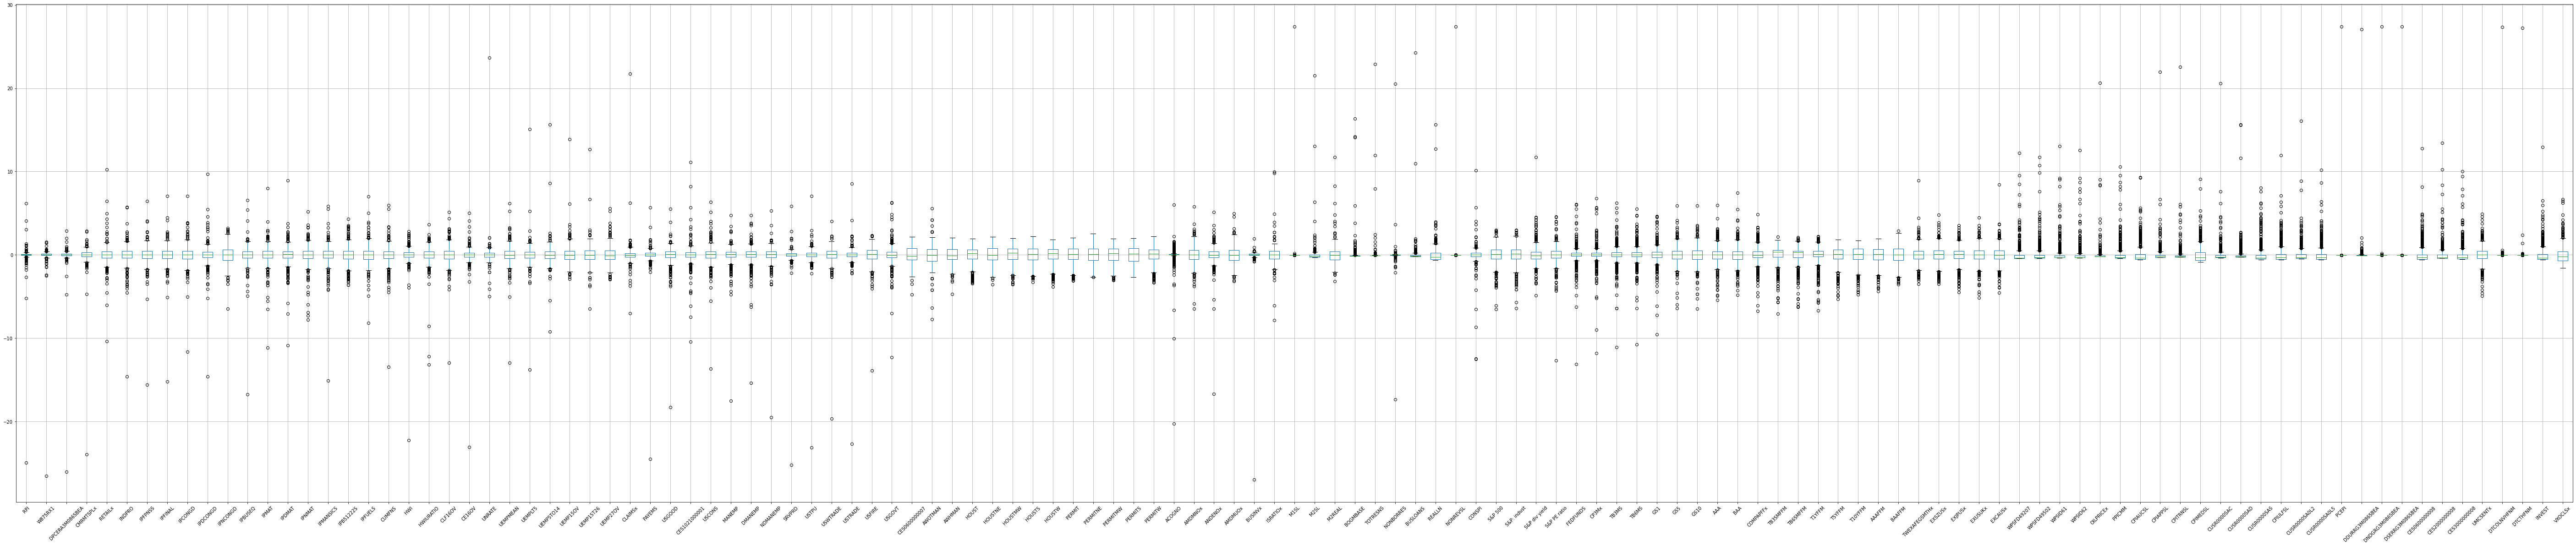

In [15]:
bp = df_scaled.boxplot(figsize=(100,20), rot=45)

#### Outliers

If we take a look at the image above we can see thatoutiliers are present in majority of the transformed and scaled dataset.

There are two options for dealing with outliers. 

One is dropping the value, and the other is filling the outlier with new value.

We can't afford dropping the values as that would mean loss of the data. 

We will set the minimum (Q1-1.5xIQR) or maximum value (Q3+1.5xIQR) for the outliers, depending on what side of the boxplot they are positioned.

In [16]:
def update_outliers(dataframe, feature):
  feature_data = dataframe[feature]
  Q1 = feature_data.quantile(0.25)
  Q3 = feature_data.quantile(0.75)
  IQR = Q3-Q1
  maximum = Q3+1.5*IQR
  minimum = Q1-1.5*IQR
  dataframe.loc[dataframe[feature]>maximum, feature] = maximum
  dataframe.loc[dataframe[feature]<minimum, feature] = minimum

In [17]:
for feature in df_scaled:
  update_outliers(df_scaled, feature)


Now let's print the boxplot for all features (click on the image to zoom):

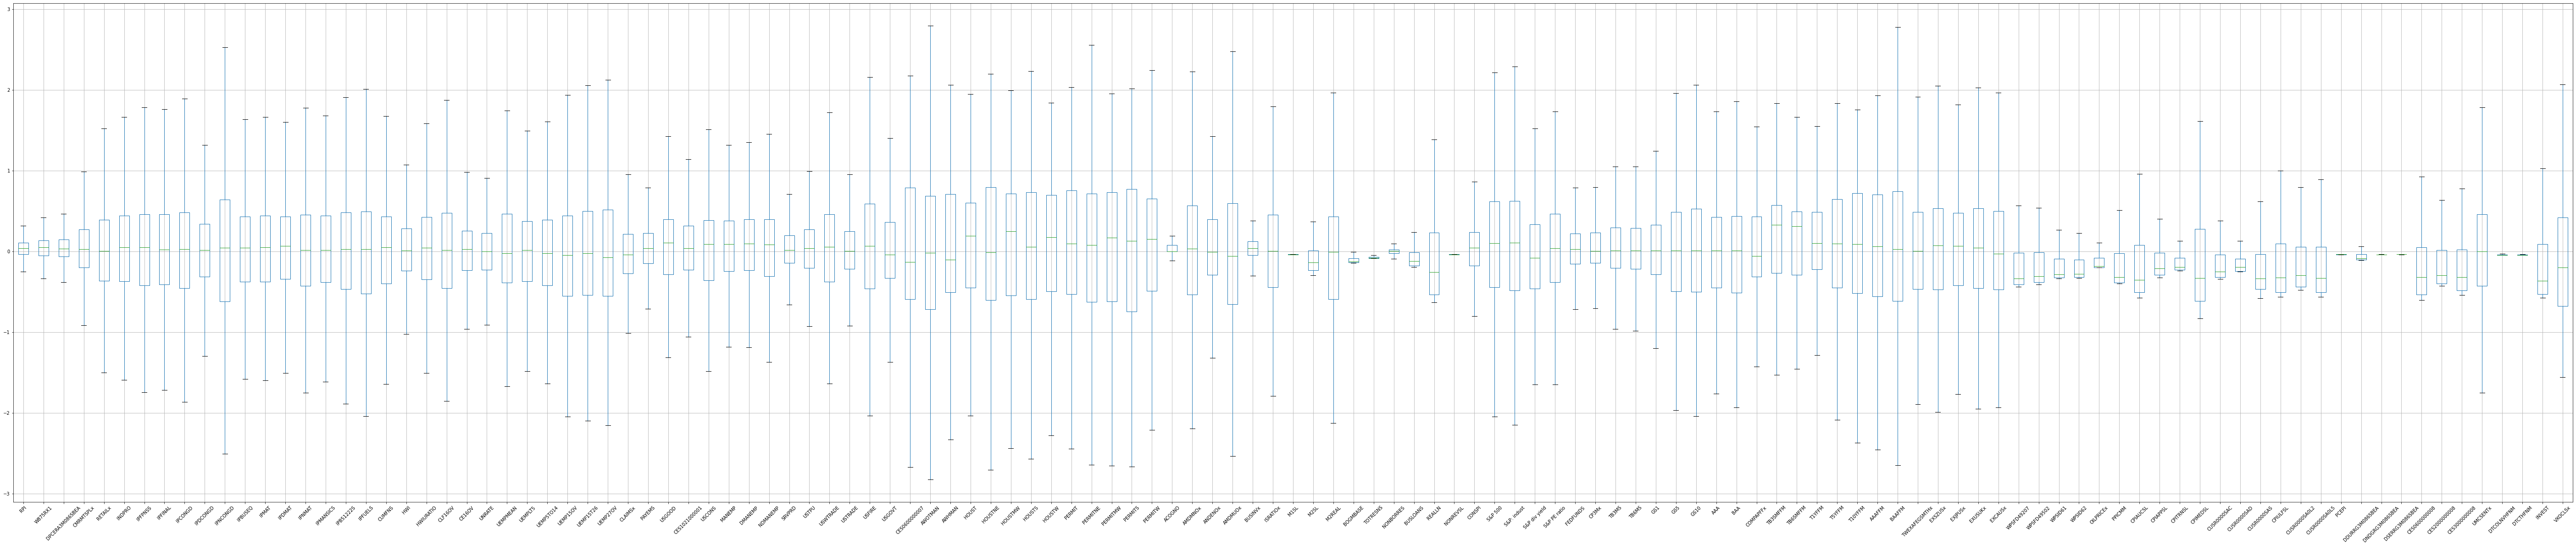

In [18]:
bp = df_scaled.boxplot(figsize=(100,20), rot=45)

We can see that there are no outliers any more. We can use this data for further analysis. 

In [19]:
df_final = df_scaled
df_final

RPI   W875RX1  DPCERA3M086SBEA  ...  DTCTHFNM    INVEST       VXOCLSx
0    0.161161  0.232777         0.281923  ... -0.045936  1.027136  1.486011e-15
1    0.163326  0.220338        -0.192781  ... -0.042113 -0.555810  1.486011e-15
2    0.138591  0.203036         0.376331  ... -0.040297  0.240486  1.486011e-15
3    0.048560  0.057202         0.074508  ... -0.034306  1.027136  1.486011e-15
4   -0.076356 -0.092433        -0.185047  ... -0.034306 -0.508082  1.486011e-15
..        ...       ...              ...  ...       ...       ...           ...
745 -0.248493 -0.043716         0.095056  ... -0.042437  1.027136 -4.475133e-01
746 -0.248493 -0.020226        -0.234719  ... -0.045969  1.027136 -1.756764e-01
747 -0.174436  0.002908         0.132739  ... -0.046307  0.175491 -6.010341e-01
748  0.176449  0.031004        -0.112984  ... -0.046517 -0.217513 -5.144652e-01
749 -0.248493 -0.336152        -0.379169  ... -0.034306 -0.092672 -6.302018e-01

[750 rows x 127 columns]

### (b) Unsupervised regression

#### Run principal components analysis on your final (transformed) FRED–MD dataset.

Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features.

In other words, PCA is a linear dimension-reduction technique that finds new axes that maximize the variance in the data. The first of these principal axes maximizes the most variance, followed by the second, and the third, and so on, which are all orthogonal to the previously computed axes.

First of all we need to find the number of components that we will take into account (click on the image to zoom).

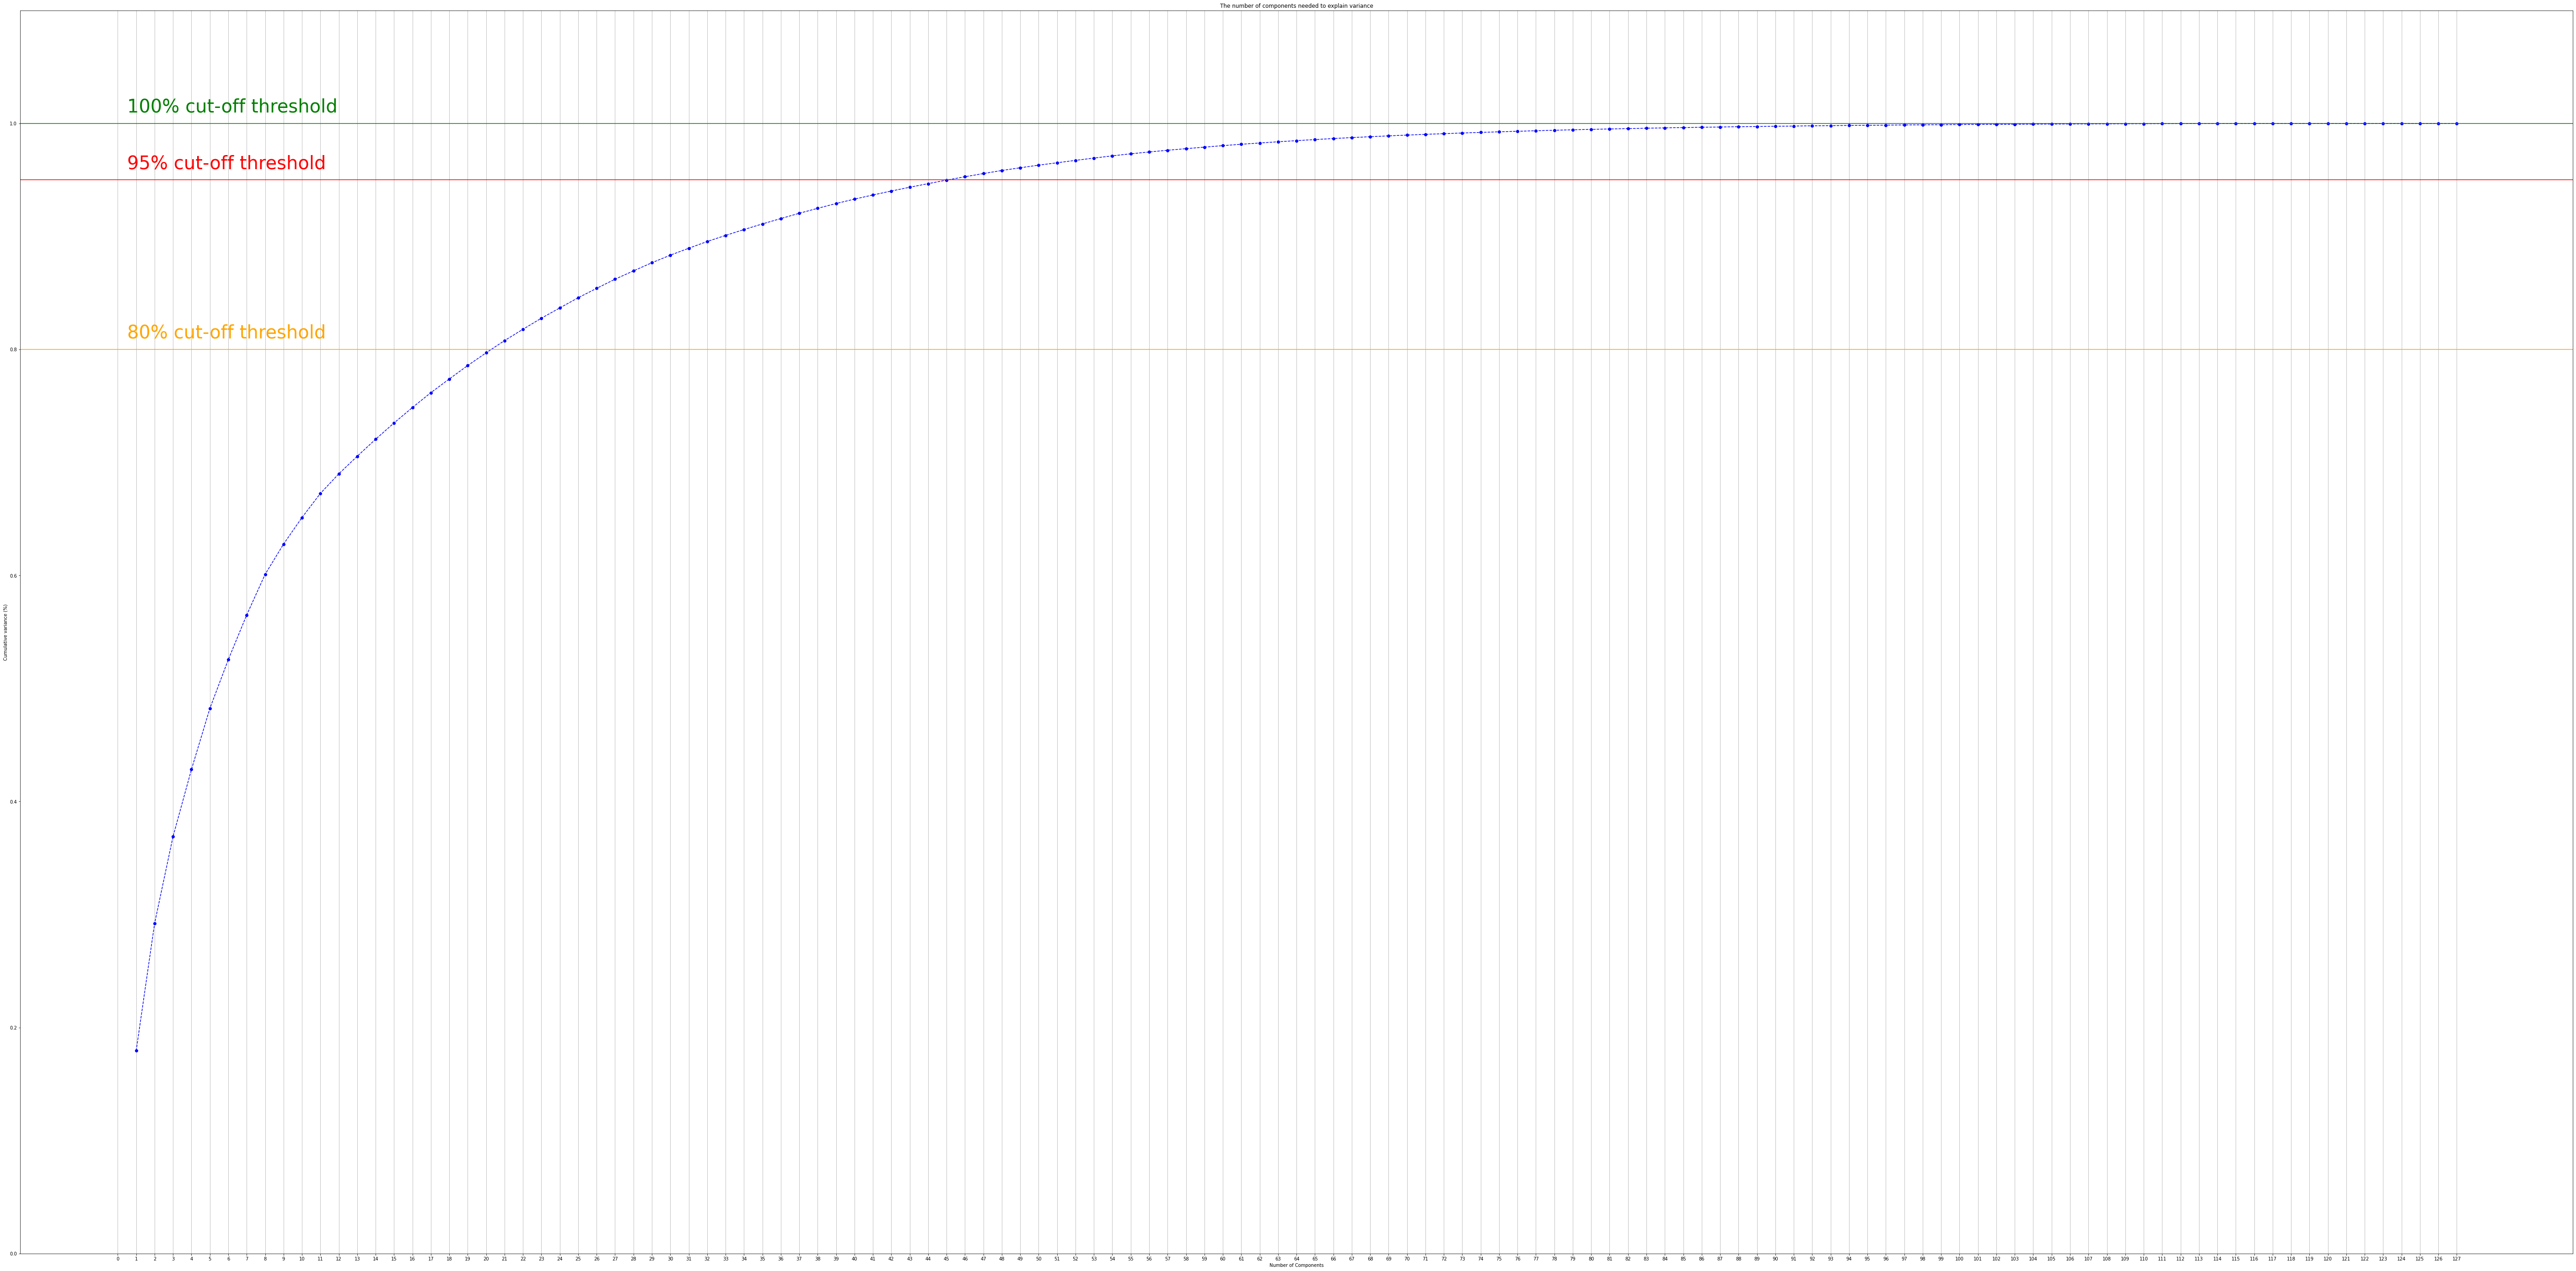

In [20]:
pca = PCA().fit(df_final)

plt.rcParams["figure.figsize"] = (100,50)

fig, ax = plt.subplots()
xi = np.arange(1, 128, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 128, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1.0, color='g', linestyle='-')
plt.text(0.5, 1.01, '100% cut-off threshold', color = 'green', fontsize=40)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.96, '95% cut-off threshold', color = 'red', fontsize=40)

plt.axhline(y=0.80, color='orange', linestyle='-')
plt.text(0.5, 0.81, '80% cut-off threshold', color = 'orange', fontsize=40)

ax.grid(axis='x')
plt.show()

The image above shows us that if we take 45 components, all our components will contain 95% of the information.

Since this is a lot of features and it is really hard and time consuming to explain each one of them (and also because of other reasons that will be explained below), we will stick to the 80% cut-off threshold. In this case, we can have **20** components for our PCA.

In [21]:
n_components = 20
pca = PCA(n_components = n_components)
pca.fit_transform(df_final)

array([[-4.01939619, -2.50110927,  0.60394766, ...,  0.55657873,
         0.80061243,  1.54000776],
       [-4.882502  , -3.5986614 ,  1.8178659 , ...,  0.26266922,
         0.66561311,  1.14713311],
       [-2.89404334, -2.60257758,  1.04055935, ..., -0.23674586,
        -1.31747968, -0.69174764],
       ...,
       [-0.73880254,  0.22435676, -0.17824814, ...,  0.44962217,
        -0.90849453, -0.4239292 ],
       [-2.36814074, -2.60961781,  0.98457611, ..., -1.25206358,
        -0.19124856,  0.76522171],
       [-1.38486374, -0.683652  , -0.06542254, ..., -0.67875229,
         1.11169147,  0.65667753]])

In [22]:
# Calculate principal components
pca_data = np.dot(pca.components_, df_final.T)
pca_data = pca_data.T
print(pca_data.shape)

(750, 20)


In [23]:
# Create a new dataframe containing principal components
df_pca = pd.DataFrame(pca_data)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       750 non-null    float64
 1   1       750 non-null    float64
 2   2       750 non-null    float64
 3   3       750 non-null    float64
 4   4       750 non-null    float64
 5   5       750 non-null    float64
 6   6       750 non-null    float64
 7   7       750 non-null    float64
 8   8       750 non-null    float64
 9   9       750 non-null    float64
 10  10      750 non-null    float64
 11  11      750 non-null    float64
 12  12      750 non-null    float64
 13  13      750 non-null    float64
 14  14      750 non-null    float64
 15  15      750 non-null    float64
 16  16      750 non-null    float64
 17  17      750 non-null    float64
 18  18      750 non-null    float64
 19  19      750 non-null    float64
dtypes: float64(20)
memory usage: 117.3 KB


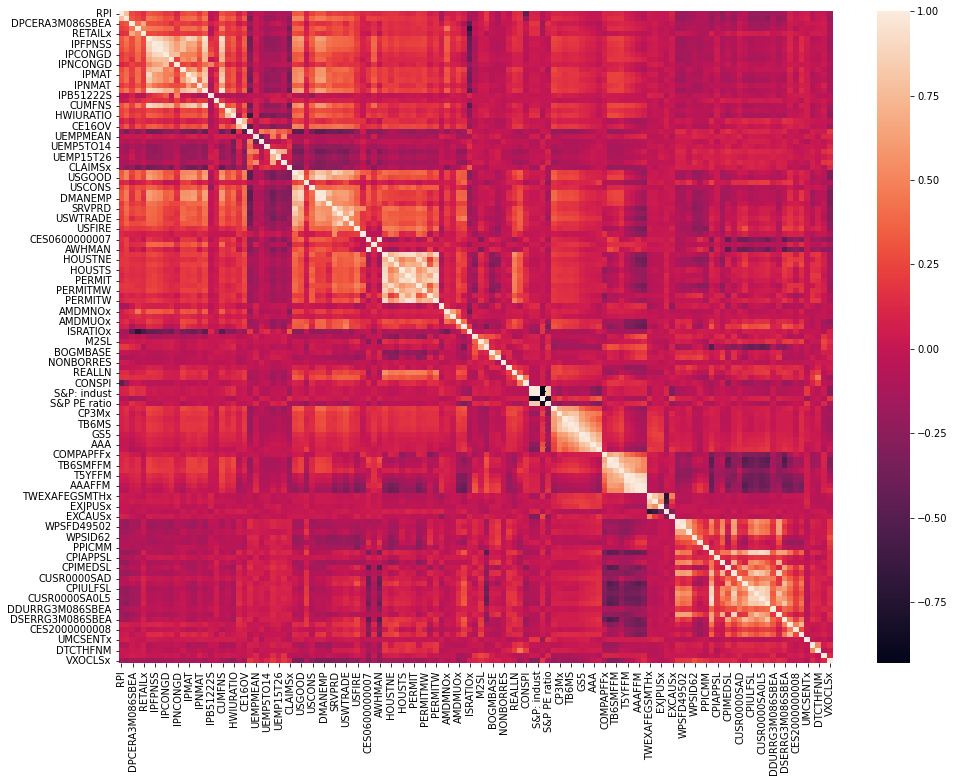

In [24]:
# Correlation between original features
plt.figure(figsize=(16,12))
c= df_final.corr()
sns.heatmap(c)
plt.show()

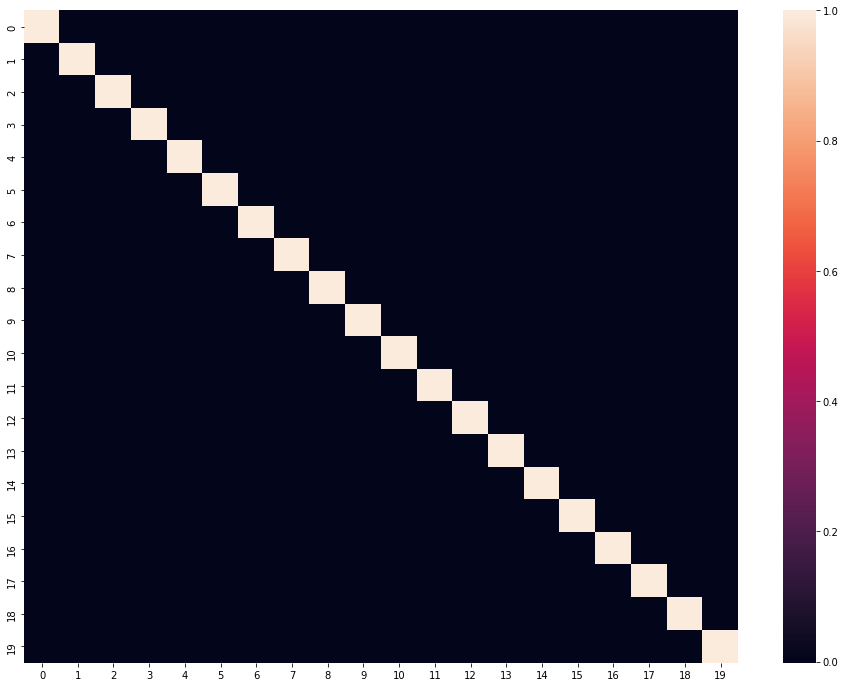

In [25]:
# Correlation between principal components
plt.figure(figsize=(16,12))
c= df_pca.corr()
sns.heatmap(c)
plt.show()

#### Report the fraction of variance explained by each principal component. How many components would you keep based on your results? Justify your answer.

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while we can convert N dimensional space to M<N dimensional space, we lose some of the variance (information) when we do this.

In [26]:
pca.explained_variance_ratio_

array([0.17943019, 0.11270237, 0.07689711, 0.05927835, 0.0540412 ,
       0.04314193, 0.03954045, 0.03597121, 0.02673346, 0.02349407,
       0.0213702 , 0.01730769, 0.01555573, 0.01508354, 0.01438537,
       0.01369775, 0.01310618, 0.01211426, 0.01185808, 0.01111717])

We already decided to keep first 20 compononents out of 45 as we lose only 15% of variance, but we also reduce the number of components by 25.

From the array output above, we can see that first component contains most of variance, 17.9%, second one contains around 11%, and so on... It drops every next element of the array.

This means that it is important to keep leftmost set of components in this array (we kept first 20 and have 80% of variance).



### (c) Interpretability

Plot the loadings for each selected principal component and discuss
your findings. Try to provide an interpretation for each of the components based on
their projections onto the space of the original features.

#### PCA Loadings

Let's first plot the PCA loadings (click on the image to zoom, or right click and save it):

In [27]:
# Plotting PCA loadings
fig = plt.figure(figsize=(200, 200))

for iPlot in range(0,n_components):
    bar_x      = df_final.columns
    bar_height = pca.components_[iPlot]
    plt.subplot(n_components, 1, iPlot+1)
    plt.tick_params(labelrotation=45)
    plt.bar(bar_x, bar_height)
    plt.ylabel('Loading')
    plt.title(f'Loadings for principal component number {iPlot+1}')

plt.show()

We will not interpret all components as there are really a lot of them, and also there are a lot of features. Instead, we will take few examples:

- *Component 1* - looking at the image above, we can see that first principal component is negatively corelated to the whole group of features call *Housing* (see the FRED-MD paperwork for more details). This means that this component increases when the values of this group of feature decreases, and vice-versa.

- *Component 4* - this component is negatively corelated to the whole group of features call *Interest and exchange rates*.

- *Component 11* - this component is relativly high correlated to these features: *AMDMNOx, ANDENOx and AMDMUOx*. This means that this component will increase when these features increase.